# Разработка A/B-тестирования и анализ результатов



## Описание данных



У этих таблиц почти совпадает структура и содержание колонок, различаются лишь периоды наблюдения.

Поля таблиц :

- `user_id` — идентификатор пользователя;

- `session_id` — идентификатор сессии в приложении;

- `session_date` — дата сессии;

- `session_start_ts` — дата и время начала сессии;

- `install_date` — дата установки приложения;

- `session_number` — порядковый номер сессии для конкретного пользователя;

- `registration_flag` — является ли пользователь зарегистрированным;

- `page_counter` — количество просмотренных страниц во время сессии;

- `region` — регион пользователя;

- `device` — тип устройства пользователя;

- `test_group` — тестовая группа (в таблице с историческими данными этого столбца нет).


## Что нужно сделать
Ваши задачи: рассчитать параметры теста, оценить корректность его проведения и проанализировать результаты эксперимента.

### 1. Работа с историческими данными (EDA)

#### 1.1. Загрузка исторических данных
На первом этапе поработайте с историческими данными приложения:

- Импортируйте библиотеку pandas.

- Считайте и сохраните в датафрейм `s` CSV-файл с историческими данными о сессиях пользователей `s`.

Выведите на экран первые пять строк полученного датафрейма.

In [1]:
import pandas as pd # Импортируем библиотеку

In [2]:
sessions_history = pd.read_csv('') # Сохраняем датафрейм

In [3]:
print(sessions_history.head(5)) # Выводим первые пять строк датафрейма

            user_id        session_id session_date     session_start_ts  \
0  E302123B7000BFE4  F9AF61A0C2023832   2025-08-15  2025-08-15 17:47:35   
1  2530F72E221829FB  85003A206CBDAC6F   2025-08-15  2025-08-15 16:42:14   
2  876E020A4FC512F5  3677423E49D72DEE   2025-08-15  2025-08-15 12:30:00   
3  2640B349E1D81584  956B45F5915CA225   2025-08-15  2025-08-15 15:31:31   
4  94E1CBFAEF1F5EE9  83BF0DA35F9F1F40   2025-08-15  2025-08-15 21:33:53   

  install_date  session_number  registration_flag  page_counter region  \
0   2025-08-15               1                  0             3    CIS   
1   2025-08-15               1                  0             4   MENA   
2   2025-08-15               1                  0             4     EU   
3   2025-08-15               1                  0             4    CIS   
4   2025-08-15               1                  0             3    CIS   

    device  
0   iPhone  
1  Android  
2       PC  
3  Android  
4  Android  


#### 1.2. Знакомство с данными




In [4]:
 # Считаем для каждого пользователя кол-во сессий 
sessions_per_user = sessions_history.groupby('user_id')['session_id'].nunique().reset_index()
print(sessions_per_user)

                 user_id  session_id
0       00005FB6A13A6FBE           2
1       0000B15A18D77ED9           3
2       0000C4E3A4A571A9           2
3       000293FAF9E67A81           4
4       00029C5AE889A6C3           2
...                  ...         ...
134034  FFFCDE7746148710           4
134035  FFFDD413285E753F           3
134036  FFFECBA0F2578AB0           2
134037  FFFEDB68228B5F21           5
134038  FFFF4228DF580C3B           3

[134039 rows x 2 columns]


In [5]:
# Ищем пользователя с наибольшим кол-вом сессий
max_sessions_user = sessions_per_user.loc[sessions_per_user['session_id'].idxmax(), 'user_id']
# Выводим все записи этого пользователя
user_data = sessions_history[sessions_history['user_id'] == max_sessions_user]
print(user_data)

                 user_id        session_id session_date     session_start_ts  \
115558  10E0DEFC1ABDBBE0  B8F0423BBFFCF5DC   2025-08-14  2025-08-14 13:57:39   
191751  10E0DEFC1ABDBBE0  87CA2FA549473837   2025-08-15  2025-08-15 16:42:10   
239370  10E0DEFC1ABDBBE0  4ADD8011DCDCE318   2025-08-16  2025-08-16 19:53:21   
274629  10E0DEFC1ABDBBE0  DF0FD0E09BF1F3D7   2025-08-17  2025-08-17 15:03:43   
302501  10E0DEFC1ABDBBE0  3C221774B4DE6885   2025-08-18  2025-08-18 17:29:14   
325557  10E0DEFC1ABDBBE0  031BD7A67048105B   2025-08-19  2025-08-19 13:23:55   
345336  10E0DEFC1ABDBBE0  FF4315CF4AD4B100   2025-08-20  2025-08-20 19:31:54   
377532  10E0DEFC1ABDBBE0  4045FEA0747203B4   2025-08-22  2025-08-22 17:54:13   
403538  10E0DEFC1ABDBBE0  344B086C421C7F37   2025-08-24  2025-08-24 14:46:13   
414743  10E0DEFC1ABDBBE0  054F20BA371E4C9D   2025-08-25  2025-08-25 18:36:41   

       install_date  session_number  registration_flag  page_counter region  \
115558   2025-08-14               1     

#### 1.3. Анализ числа регистраций


In [6]:
daily_stats = sessions_history.groupby('session_date').agg(
    unique_users=('user_id', 'nunique'),  # Число уникальных пользователей
    registered_users=('registration_flag', 'sum')  # Число зарегистрированных
).reset_index()
print(daily_stats)

   session_date  unique_users  registered_users
0    2025-08-11          3919               169
1    2025-08-12          6056               336
2    2025-08-13          8489               464
3    2025-08-14         10321               625
4    2025-08-15         14065               840
5    2025-08-16         12205               916
6    2025-08-17         11200               833
7    2025-08-18         10839               860
8    2025-08-19         12118               831
9    2025-08-20         13514              1008
10   2025-08-21         15051              1063
11   2025-08-22         17563              1251
12   2025-08-23         16082              1253
13   2025-08-24         13683              1181
14   2025-08-25         13635              1060
15   2025-08-26         13289              1050
16   2025-08-27         14766              1076
17   2025-08-28         15388              1175
18   2025-08-29         16873              1174
19   2025-08-30         14891           

In [7]:
# Импортируем библиотеки для создания графиков
import matplotlib.pyplot as plt
import seaborn as sns

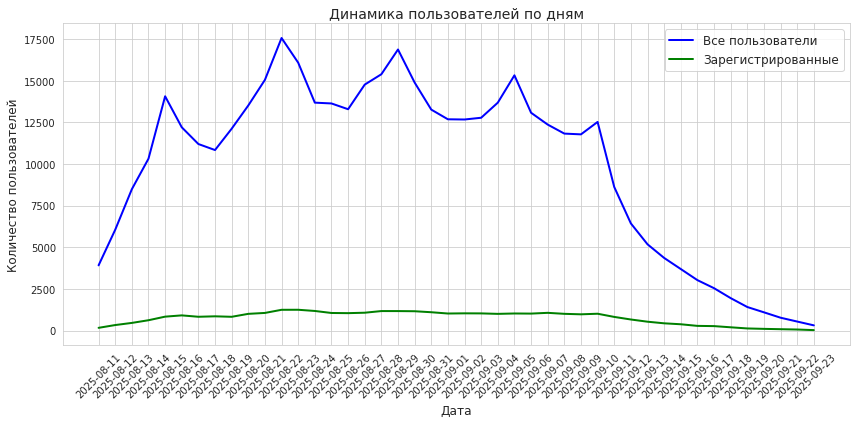

In [8]:
# Создаем график
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Линия общего числа пользователей
sns.lineplot(data=daily_stats, x='session_date', y='unique_users', 
             label='Все пользователи', linewidth=2, color='blue')

# Линия зарегистрированных пользователей
sns.lineplot(data=daily_stats, x='session_date', y='registered_users', 
             label='Зарегистрированные', linewidth=2, color='green')

# Настройки графика
plt.title('Динамика пользователей по дням', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.xticks(rotation=45)
plt.legend(fontsize=12)
plt.tight_layout()

# Отображаем график
plt.show()

In [9]:
# Расчет доли зарегистрированных пользователей
daily_stats['registered_ratio'] = daily_stats['registered_users'] / daily_stats['unique_users'] * 100

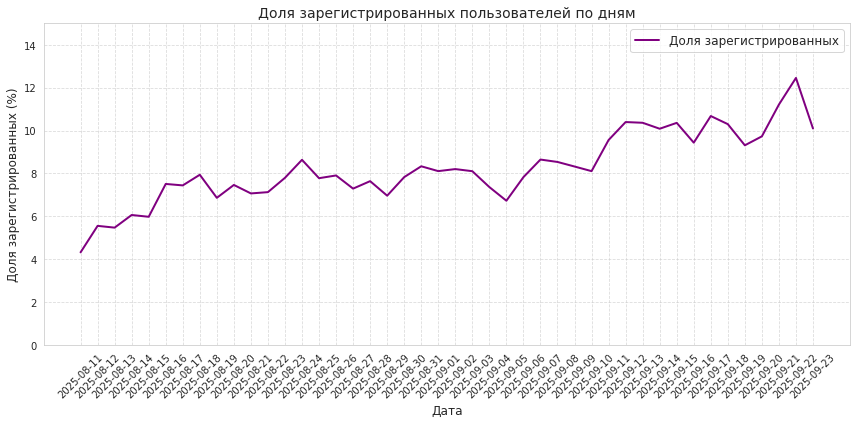

In [10]:
# Создаем график
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Линия доли зарегистрированных пользователей
sns.lineplot(data=daily_stats, x='session_date', y='registered_ratio',
             linewidth=2, color='purple', label='Доля зарегистрированных')

# Настройки графика
plt.title('Доля зарегистрированных пользователей по дням', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Доля зарегистрированных (%)', fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, 15)  # Ограничиваем ось Y от 0 до 100%
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()

plt.show()

#### 1.4. Анализ числа просмотренных страниц


In [11]:
# Находим кол-во сессий для каждого кол-ва просмотренных страниц
page_session_counts = sessions_history.groupby('page_counter')['session_id'].count().reset_index()
# Переименовываем столбцы
page_session_counts.columns = ['pages_viewed', 'session_count']

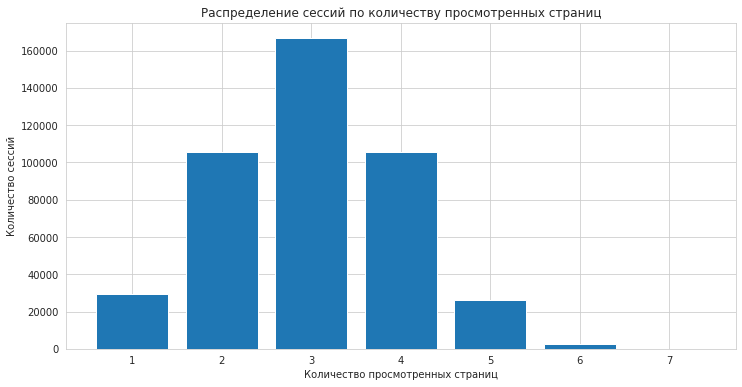

In [12]:
# Создаем график
plt.figure(figsize=(12, 6))
plt.bar(page_session_counts['pages_viewed'], page_session_counts['session_count'])
plt.xlabel('Количество просмотренных страниц')
plt.ylabel('Количество сессий')
plt.title('Распределение сессий по количеству просмотренных страниц')
plt.show()

#### 1.5. Доля пользователей, просмотревших более четырёх страниц


In [13]:
# Создаем новый столбец good_session
sessions_history['good_session'] = sessions_history['page_counter'].apply(
    lambda x: 1 if x >= 4 else 0)

In [14]:
# Считаем долю успешных сессий по дням
daily_good_sessions = sessions_history.groupby('session_date')['good_session'].mean().reset_index()
daily_good_sessions.columns = ['date', 'good_session_ratio']

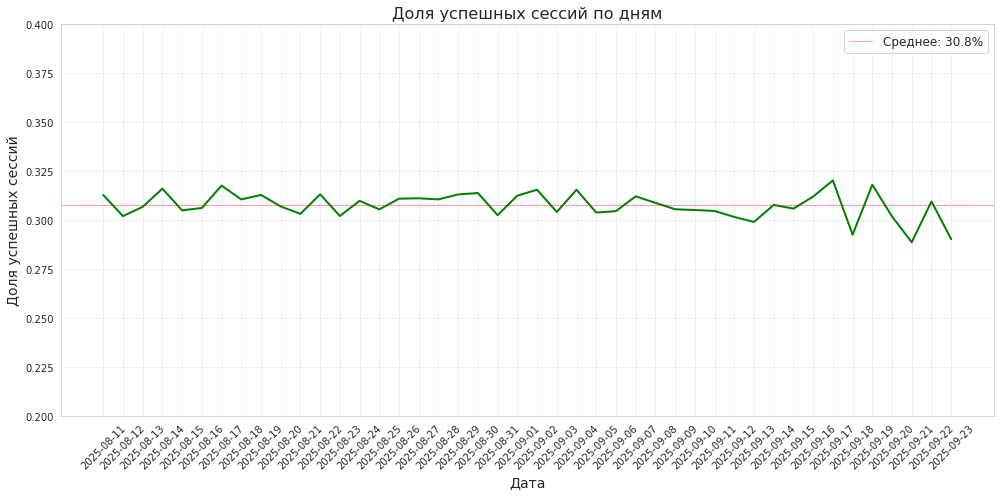

In [15]:
# Создаем график
plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")

# Линейный график
sns.lineplot(data=daily_good_sessions, 
             x='date', 
             y='good_session_ratio',
             linewidth=2,
             color='green')

# Горизонтальная линия среднего значения
mean_ratio = daily_good_sessions['good_session_ratio'].mean()
plt.axhline(y=mean_ratio, color='red', linestyle='--', linewidth=0.5,
            label=f'Среднее: {mean_ratio:.1%}')

# Настройки графика
plt.title('Доля успешных сессий по дням', fontsize=16)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Доля успешных сессий', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0.2, 0.4)  # Ограничение от 0% до 100%

plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 2. Подготовка к тесту


#### 2.1 Формулировка нулевой и альтернативной гипотез



Основная метрика, которая будет использоваться для оценки нового алгоритма — среднее количество просмотренных страниц за сессию (`page_counter`).

**Нулевая гипотеза:** новый алгоритм рекомендаций не влияет на среднее количество просмотренных страниц за сессию.

**Альтернативная гипотеза:** новый алгоритм увеличивает среднее количество просмотренных страниц за сессию.


#### 2.2. Расчёт размера выборки


In [16]:
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize

# Задаём параметры
alpha = 0.05  # Уровень значимости
beta = 0.2  # Ошибка второго рода, часто 1 - мощность
power = 0.8  # Мощность теста
p = 0.3 # Базовый уровень доли
mde = 0.03  # Минимальный детектируемый эффект
effect_size = proportion_effectsize(p, p + mde)

# Инициализируем класс NormalIndPower
power_analysis = NormalIndPower()

# Рассчитываем размер выборки
sample_size = power_analysis.solve_power(
    effect_size = effect_size,
    power = power,
    alpha = alpha,
    ratio = 1 # Равномерное распределение выборок
)

print(f"Необходимый размер выборки для каждой группы: {int(sample_size)}")

Необходимый размер выборки для каждой группы: 3761


#### 2.3. Расчёт длительности A/B-теста



In [17]:
from math import ceil

# Среднее количество пользователей приложения в день по историческим данным
avg_daily_users = round(sessions_history.groupby('session_date').agg({"user_id" : 'nunique'}).mean().iloc[0])

# Рассчитываем длительность теста в днях как отношение размера выборки к среднему числу пользователей
test_duration = ceil(sample_size *2 / avg_daily_users)

print(f"Рассчитанная длительность A/B-теста при текущем уровене трафика в {avg_daily_users} пользователей в день составит {test_duration} дней")

Рассчитанная длительность A/B-теста при текущем уровене трафика в 9907 пользователей в день составит 1 дней


### 3. Мониторинг А/В-теста

#### 3.1. Проверка распределения пользователей



In [18]:
sessions_test_part = pd.read_csv('/datasets/sessions_project_test_part.csv') # Сохраняем датафрейм

In [19]:
# Уникальные пользователи по группам
users_per_group = sessions_test_part.groupby('test_group')['user_id'].nunique()

In [20]:
print("Количество уникальных пользователей по группам:")
print(users_per_group)

Количество уникальных пользователей по группам:
test_group
A    1477
B    1466
Name: user_id, dtype: int64


In [21]:
# Расчет процентной разницы
group_a = users_per_group['A']
group_b = users_per_group['B']
diff_percent = abs(group_a - group_b) / ((group_a + group_b)/2) * 100
print(f"Процентная разница между группами: {diff_percent:.2f}%")

Процентная разница между группами: 0.75%


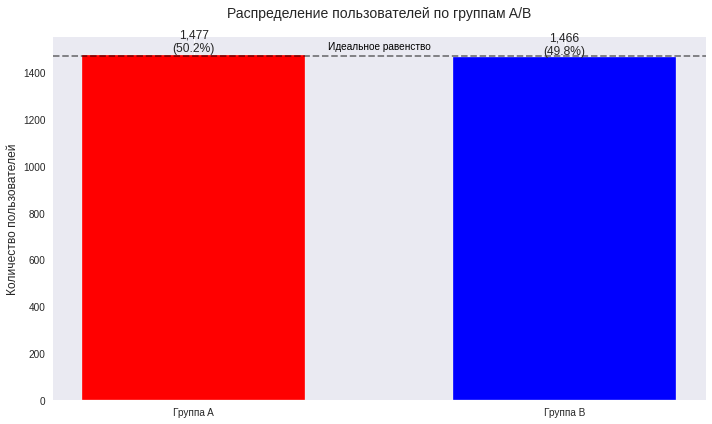

In [22]:
# Настройка стиля
plt.style.use('seaborn')

# Создание столбчатой диаграммы
fig, ax = plt.subplots(figsize=(10, 6))

# Данные для графика
groups = ['Группа A', 'Группа B']
users = [group_a, group_b]
colors = ['red', 'blue']

# Построение графика
bars = ax.bar(groups, users, color=colors, width=0.6)

# Добавление значений на столбцы
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:,}\n({height/sum(users)*100:.1f}%)',
            ha='center', va='bottom', fontsize=12)

# Настройка оформления
ax.set_title('Распределение пользователей по группам A/B', pad=20, fontsize=14)
ax.set_ylabel('Количество пользователей', fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Линия для обозначения идеального равенства
ax.axhline(y=sum(users)/2, color='black', linestyle='--', alpha=0.5)
ax.text(0.5, sum(users)/2*1.02, 'Идеальное равенство', 
        color='black', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

#### 3.2. Проверка пересечений пользователей


In [23]:
# Получаем списки уникальных пользователей из каждой группы
users_a = set(sessions_test_part[sessions_test_part['test_group'] == 'A']['user_id'].unique())
users_b = set(sessions_test_part[sessions_test_part['test_group'] == 'B']['user_id'].unique())

# Находим пересечение пользователей
common_users = users_a & users_b
num_common_users = len(common_users)

if num_common_users == 0:
    print("Группы независимы. Нет пользователей, присутствующих в обеих группах.")
else:
    print(f"Обнаружено {num_common_users} пользователей в обеих группах:")

Группы независимы. Нет пользователей, присутствующих в обеих группах.


#### 3.3. Равномерность разделения пользователей по устройствам



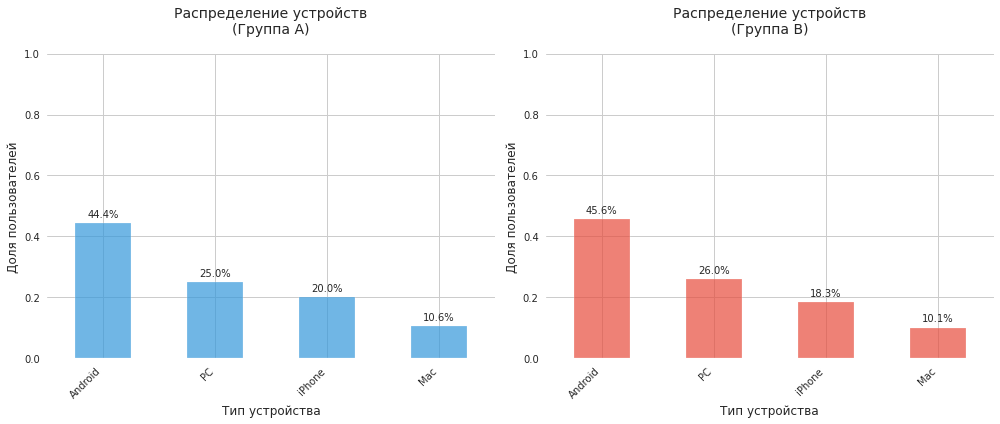

In [36]:
# Получаем уникальных пользователей с их устройствами
unique_users = sessions_test_part.drop_duplicates(subset=['user_id', 'device'])
# Настройка стиля графиков
sns.set_style("whitegrid")
plt.figure(figsize=(14, 6))

# График для группы A
plt.subplot(1, 2, 1)
device_dist_a = unique_users[unique_users['test_group'] == 'A']['device'].value_counts(normalize=True)
device_dist_a.plot(kind='bar', color='#3498db', alpha=0.7)
plt.title('Распределение устройств\n(Группа A)', pad=20, fontsize=14)
plt.xlabel('Тип устройства', fontsize=12)
plt.ylabel('Доля пользователей', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
for i, v in enumerate(device_dist_a):
    plt.text(i, v + 0.02, f"{v:.1%}", ha='center', fontsize=10)

# График для группы B
plt.subplot(1, 2, 2)
device_dist_b = unique_users[unique_users['test_group'] == 'B']['device'].value_counts(normalize=True)
device_dist_b.plot(kind='bar', color='#e74c3c', alpha=0.7)
plt.title('Распределение устройств\n(Группа B)', pad=20, fontsize=14)
plt.xlabel('Тип устройства', fontsize=12)
plt.ylabel('Доля пользователей', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
for i, v in enumerate(device_dist_b):
    plt.text(i, v + 0.02, f"{v:.1%}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

#### 3.4. Равномерность распределения пользователей по регионам



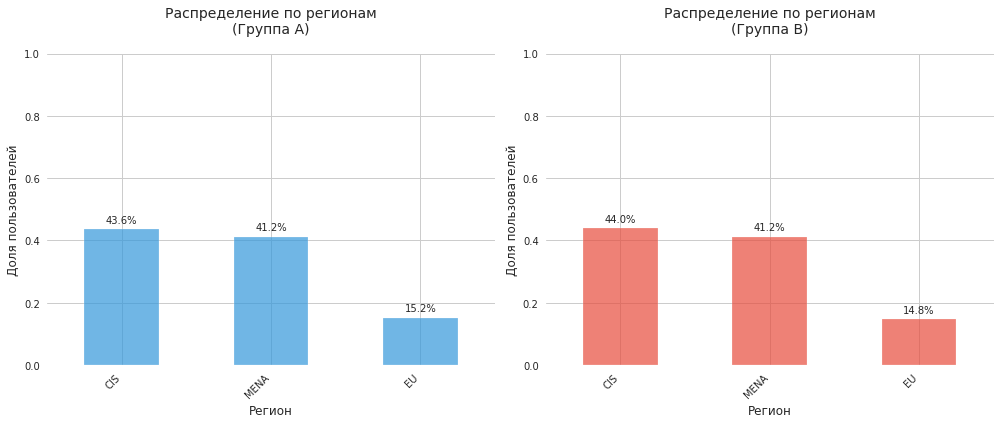

In [37]:
# Получаем уникальных пользователей с их устройствами
unique_users_region = sessions_test_part.drop_duplicates(subset=['user_id', 'region'])
# Настройка стиля графиков
sns.set_style("whitegrid")
plt.figure(figsize=(14, 6))

# График для группы A
plt.subplot(1, 2, 1)
device_dist_a = unique_users_region[unique_users_region['test_group'] == 'A']['region'].value_counts(normalize=True)
device_dist_a.plot(kind='bar', color='#3498db', alpha=0.7)
plt.title('Распределение по регионам\n(Группа A)', pad=20, fontsize=14)
plt.xlabel('Регион', fontsize=12)
plt.ylabel('Доля пользователей', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
for i, v in enumerate(device_dist_a):
    plt.text(i, v + 0.02, f"{v:.1%}", ha='center', fontsize=10)

# График для группы B
plt.subplot(1, 2, 2)
device_dist_b = unique_users_region[unique_users_region['test_group'] == 'B']['region'].value_counts(normalize=True)
device_dist_b.plot(kind='bar', color='#e74c3c', alpha=0.7)
plt.title('Распределение по регионам\n(Группа B)', pad=20, fontsize=14)
plt.xlabel('Регион', fontsize=12)
plt.ylabel('Доля пользователей', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
for i, v in enumerate(device_dist_b):
    plt.text(i, v + 0.02, f"{v:.1%}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

#### 3.5. Вывод после проверки A/B-теста



**- Расчитали процентное различие между двумя группами, оно незначительное и всего лишь 0.75%.**

**- Выборки являются независимыми, так как не было обнаружено пересечений пользователей из групп А и Б.**

**- Категориальные переменные естественно не идеально ровные, но критических различий нет, группы получились плюс минус равномерными.**

**A/B-тест проходит корректно.**

### 4. Проверка результатов A/B-теста



#### 4.1. Получение результатов теста и подсчёт основной метрики



In [26]:
sessions_test = pd.read_csv('/datasets/sessions_project_test.csv') # Сохраняем датафрейм
# Создаем новый столбец good_session
sessions_test['good_session'] = sessions_test['page_counter'].apply(
    lambda x: 1 if x >= 4 else 0)
print(sessions_test.head(8))

            user_id        session_id session_date     session_start_ts  \
0  6DAE3B3654DA738E  C69249E26E58F6E2   2025-10-26  2025-10-26 18:15:05   
1  0A3FE5D1DD59110A  66D66D7C9F5181B7   2025-10-21  2025-10-21 17:04:53   
2  2041F1D7AA740B88  50DE51D42215E74C   2025-10-23  2025-10-23 17:39:29   
3  43D7585009168086  5763C0C353C22263   2025-10-24  2025-10-24 15:01:57   
4  15AD68B14D62D88C  B1AD09F93C1053BC   2025-10-17  2025-10-17 17:34:39   
5  31F7A42B32103403  E9B64B779C3348ED   2025-10-20  2025-10-20 17:09:41   
6  87C09E3E3B334959  FECFF83C13DC9364   2025-10-22  2025-10-22 23:51:42   
7  457F2674E87EF6E7  14F71C18BE2CEC08   2025-10-19  2025-10-19 11:49:11   

  install_date  session_number  registration_flag  page_counter region  \
0   2025-10-16               3                  0             3   MENA   
1   2025-10-15               2                  1             2    CIS   
2   2025-10-19               3                  0             2   MENA   
3   2025-10-18              

#### 4.2. Проверка корректности результатов теста



In [27]:
# Группировка по дате и тестовой группе + подсчет уникальных сессий
daily_sessions = sessions_test.groupby(['session_date', 'test_group'])['session_id'].nunique().unstack()

# Визуализация результатов
print("Количество уникальных сессий по дням и группам:")
print(daily_sessions)

Количество уникальных сессий по дням и группам:
test_group       A     B
session_date            
2025-10-14    1502  1628
2025-10-15    2235  2283
2025-10-16    3280  3241
2025-10-17    4089  4054
2025-10-18    5013  5059
2025-10-19    6535  6779
2025-10-20    5837  6089
2025-10-21    3927  3981
2025-10-22    3083  3111
2025-10-23    2470  2548
2025-10-24    2090  2068
2025-10-25    1897  1814
2025-10-26    1669  1692
2025-10-27    1454  1517
2025-10-28    1279  1289
2025-10-29    1068  1131
2025-10-30     887   876
2025-10-31     644   669
2025-11-01     434   465
2025-11-02     158   160


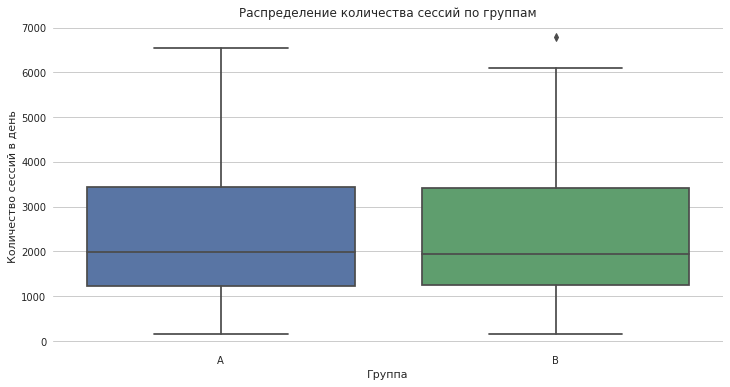

In [28]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=daily_sessions.melt(), x='test_group', y='value')
plt.title('Распределение количества сессий по группам')
plt.xlabel('Группа')
plt.ylabel('Количество сессий в день')
plt.show()

In [29]:
# Проверка нормальности распределения (тест Шапиро-Уилка)
from scipy.stats import shapiro

_, p_a = shapiro(daily_sessions['A'])
_, p_b = shapiro(daily_sessions['B'])

print(f"Тест на нормальность (группа A): p-value = {p_a:.3f}")
print(f"Тест на нормальность (группа B): p-value = {p_b:.3f}")

# Проверка равенства дисперсий (тест Левена)
from scipy.stats import levene

_, p_levene = levene(daily_sessions['A'], daily_sessions['B'])
print(f"\nТест на равенство дисперсий: p-value = {p_levene:.3f}")

Тест на нормальность (группа A): p-value = 0.101
Тест на нормальность (группа B): p-value = 0.075

Тест на равенство дисперсий: p-value = 0.960


In [30]:
from scipy.stats import ttest_ind  # Добавляем импорт функции
t_stat, p_value = ttest_ind(daily_sessions['A'], 
                           daily_sessions['B'],
                           equal_var=(p_levene > 0.05))  # Учитываем результат теста Левена

print(f"\nРезультаты t-теста:")
print(f"t-статистика = {t_stat:.3f}")
print(f"p-value = {p_value:.3f}")

# Интерпретация
alpha = 0.05
if p_value > alpha:
    print("\n Различия не статистически значимы (p > 0.05)")
    print("Количество сессий в группах можно считать одинаковым")
else:
    print("\n⚠️ Обнаружены статистически значимые различия (p ≤ 0.05)")
    print(f"Среднее в группе A: {daily_sessions['A'].mean():.1f}")
    print(f"Среднее в группе B: {daily_sessions['B'].mean():.1f}")


Результаты t-теста:
t-статистика = -0.078
p-value = 0.938

 Различия не статистически значимы (p > 0.05)
Количество сессий в группах можно считать одинаковым


Этот анализ подтверждает, что распределение трафика между группами было равномерным в течение всего теста.

#### 4.3. Сравнение доли успешных сессий



In [31]:
# Расчет доли успешных сессий по группам
grouped = sessions_test.groupby('test_group')['good_session'].agg(['mean', 'size'])
grouped.columns = ['success_rate', 'total_sessions']

# Разница между группами
diff = grouped.loc['B', 'success_rate'] - grouped.loc['A', 'success_rate']
rel_diff = diff / grouped.loc['A', 'success_rate'] * 100  

In [32]:
# Вывод результатов
print(f"Доля успешных сессий:\n"
      f"Группа A: {grouped.loc['A', 'success_rate']:.2%} ({grouped.loc['A', 'total_sessions']} сессий)\n"
      f"Группа B: {grouped.loc['B', 'success_rate']:.2%} ({grouped.loc['B', 'total_sessions']} сессий)\n"
      f"\nАбсолютная разница: {diff:.4f}\n"
      f"Относительная разница: {rel_diff:.2f}%\n")

Доля успешных сессий:
Группа A: 30.77% (49551 сессий)
Группа B: 31.83% (50454 сессий)

Абсолютная разница: 0.0106
Относительная разница: 3.43%



#### 4.4. Насколько статистически значимо изменение ключевой метрики



In [33]:
# Проверка статистической значимости
t_stat, p_value = ttest_ind(
    sessions_test[sessions_test['test_group'] == 'A']['good_session'],
    sessions_test[sessions_test['test_group'] == 'B']['good_session'])
alpha = 0.05
print(f"p-value = {p_value:}")
if p_value > alpha:
    print("\nВывод: различия не статистически значимы (p > 0.05)")
else:
    print(f"\nВывод: различия статистически значимы (p ≤ 0.05)")
    if diff > 0:
        print("Группа B показывает лучший результат")
    else:
        print("Группа A показывает лучший результат")

p-value = 0.0003148608995858183

Вывод: различия статистически значимы (p ≤ 0.05)
Группа B показывает лучший результат


#### 4.5. Вывод по результатам A/B-эксперимента



Характеристики:

- Длительность эксперимента: 20 дней.

- Количество задействованных пользователей: группа A = 1477 и группа B = 1466.

Внедрение нового алгоритма повлияло на рост ключевой метрики положительно. Количество успешных сессий в тестовой выборке примерно на 1.1% выше, чем в контрольной и p-value = 0.0003148608995858183. 

Новый алгоритм рекомендаций стоит внедрить, так как:

Статистическая значимость: крайне низкий p-value свидетельствует, что разница не случайна и вероятность ложноположительного результата (ошибка I рода) менее 0.03%.

Практическая значимость:

Рост на 1.1% может казаться небольшим, но для платформы с миллионами сессий это даст:

Дополнительные XX,000 успешных сессий в месяц, увеличение времени пребывания в приложении, потенциальный рост дохода от рекламы/подписок.